In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad
import matplotlib
import sys
import os

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)


from MieSppForce import  green_func, frenel, dipoles, force
from MieSppForce.directivity import get_directivity

In [3]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7


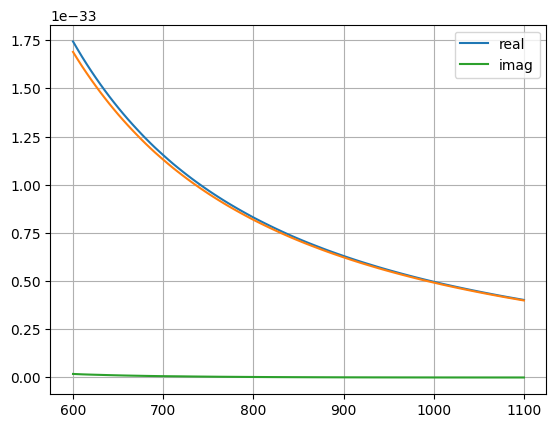

In [3]:
#eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')



#eps_Si = 3
R = 15

wls = np.linspace(600, 1100, 100)



# plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[0].real*eps0_const, )
# plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[0].real)
# plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[0].imag)

plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[1].real/c_const, label='real')
plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[1].real/c_const)
plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[1].imag/c_const , label='imag')
plt.grid()
plt.legend()

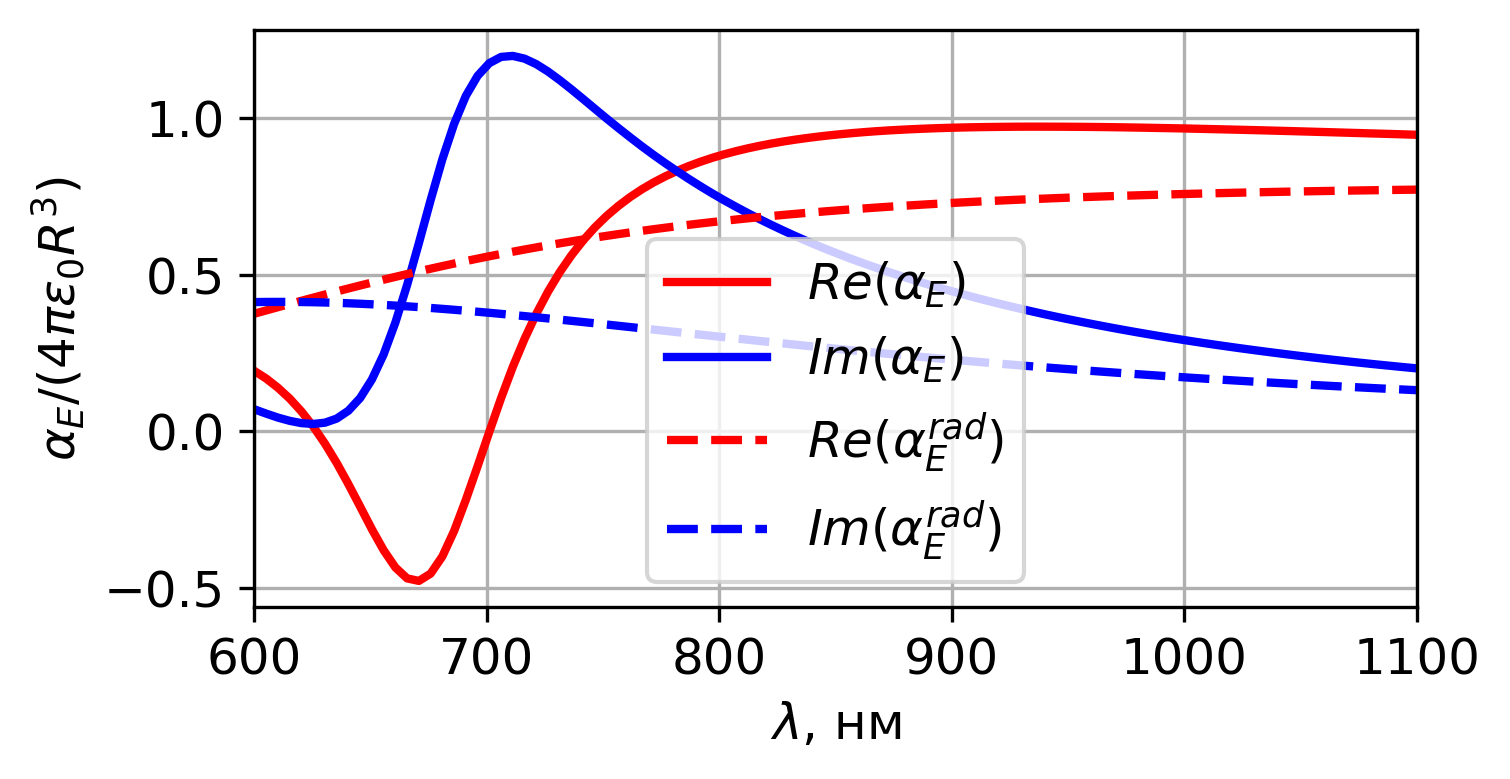

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

eps_Si = frenel.get_interpolate('Si')



#eps_Si = 3
R = 120

wls = np.linspace(600, 1100, 100)


plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[0].real*eps0_const / (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Re(\alpha_E)$', c='red', lw=2 )

plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[0].imag*eps0_const/ (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Im(\alpha_E)$', c='blue', lw=2 )

plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[0].real/ (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Re(\alpha_E^{rad})$', c='red', lw=2, ls='--')
plt.plot(wls, dipoles.get_alpha(R, eps_Si, wls)[0].imag/ (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Im(\alpha_E^{rad})$', c='blue', lw=2, ls='--' )

plt.ylabel(r'$\alpha_E/(4 \pi \varepsilon_0 R^3)$')
plt.xlabel(r'$\lambda$, нм')
plt.xlim(wls[0], wls[-1] )

plt.grid()
plt.legend()
plt.savefig('ALPHAH_E.pdf', bbox_inches='tight')


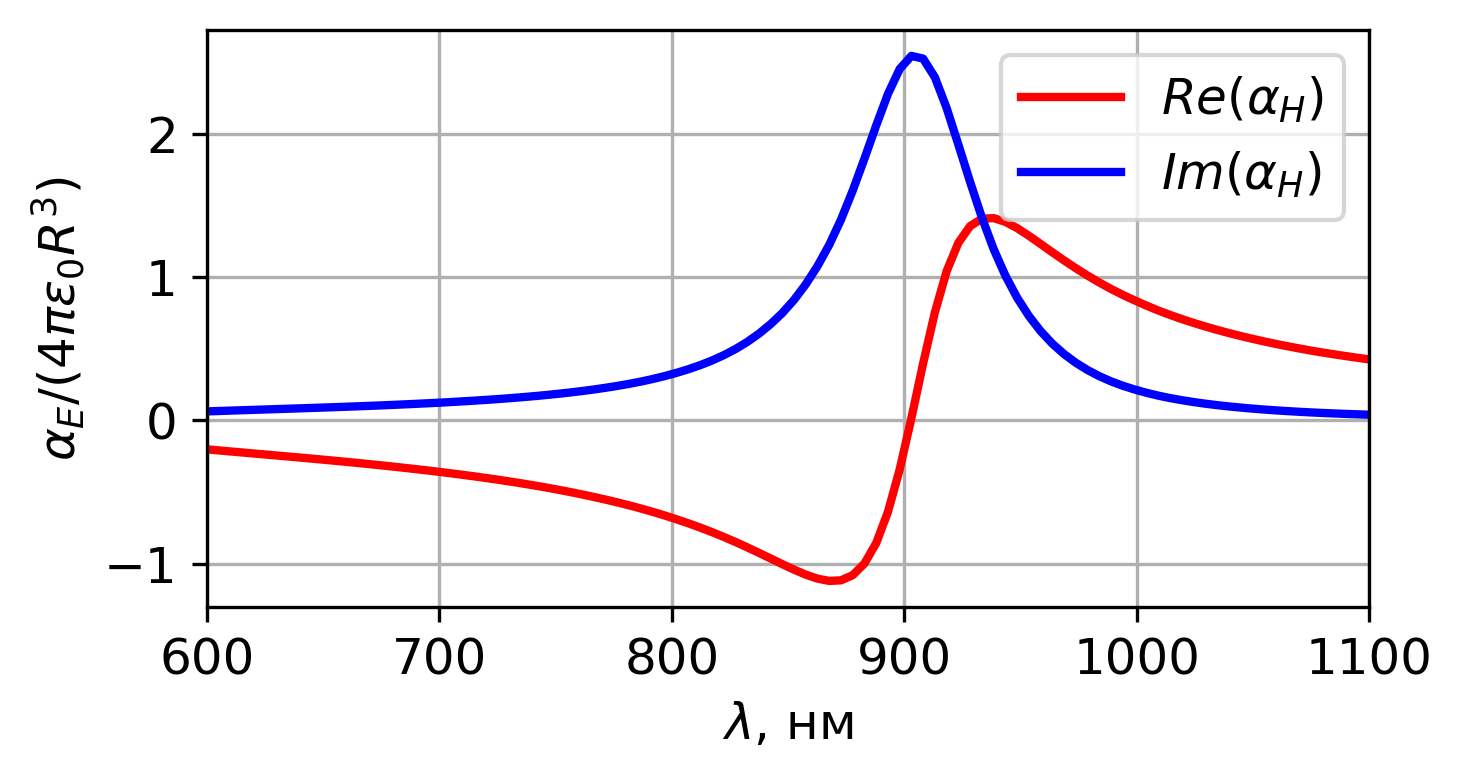

In [5]:

mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[1].real*eps0_const / (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Re(\alpha_H)$', c='red', lw=2 )
plt.plot(wls, dipoles.alpha_v2(wls, R, eps_Si)[1].imag*eps0_const/ (4 * np.pi * eps0_const * (R*1e-9)**3), label=r'$Im(\alpha_H)$', c='blue', lw=2 )

plt.ylabel(r'$\alpha_E/(4 \pi \varepsilon_0 R^3)$')
plt.xlabel(r'$\lambda$, нм')
plt.xlim(wls[0], wls[-1] )

plt.grid()
plt.legend()
plt.savefig('ALPHAH_H.pdf', bbox_inches='tight')

In [4]:
eps_Si = frenel.get_interpolate('Si')

R = 120
dist = 0
a_angle = 0
angle = 35*np.pi/180
point = [0,0,dist+R]
z0 = point[2]
phase = 0
k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9
STOP=45


P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)



for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], 1, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m
    

        

NameError: name 'wls' is not defined

(600.0, 1100.0)

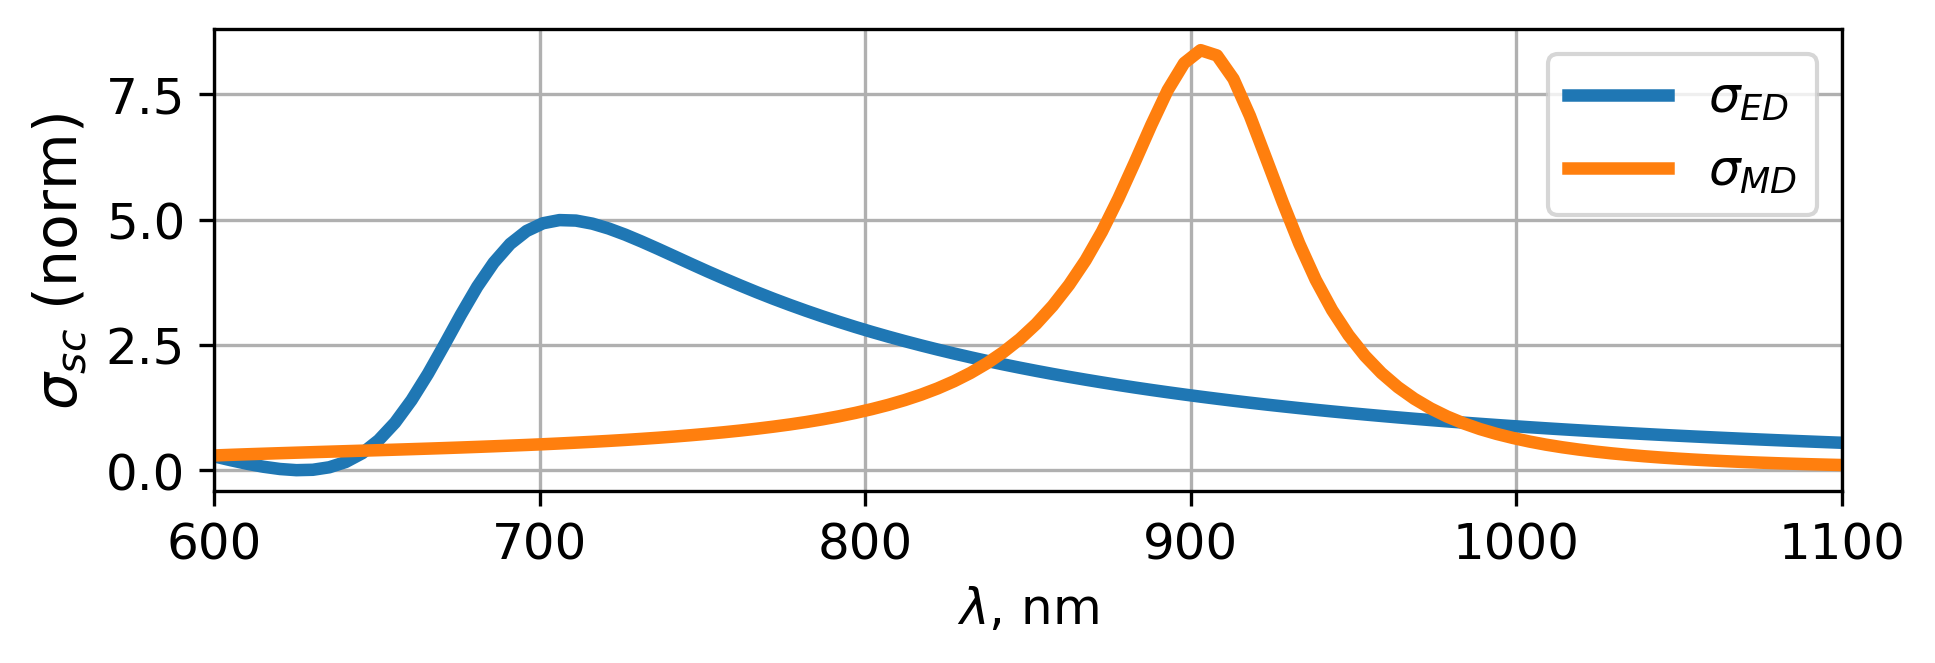

In [7]:
const_sigma_sc = k0(wls)**4/(6*np.pi*eps0_const**2)

ED = np.abs(P[:,0])**2+ np.abs(P[:,1])**2+np.abs(P[:,2])**2

MD = (np.abs(M[:,0])**2+ np.abs(M[:,1])**2+np.abs(M[:,2])**2)/c_const**2

sigma_ED = ED *const_sigma_sc
sigma_MD = MD * const_sigma_sc




fig, ax1 = plt.subplots(1, 1, figsize=(7, 2), dpi=300)

# Первый график: ED и MD

ax1.plot(wls, sigma_ED/(np.pi*(R*1e-9)**2), label='$\\sigma_{ED}$', lw=3)
ax1.plot(wls, sigma_MD/(np.pi*(R*1e-9)**2), label='$\\sigma_{MD}$', lw=3)


# ax1.plot(sigma_sc[:, 0], sigma_sc[:, 1], label='$\\sigma_{ED}$', linewidth=2, color='#1f77b4', ls='--')
# ax1.plot(sigma_sc[:, 0], sigma_sc[:, 2], label='$\\sigma_{MD}$', linewidth=2, color='#ff7f0e', ls='--')
ax1.set_ylabel('$\\sigma_{sc}$ (norm)', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)
ax1.set_xlabel('$\\lambda$, nm')

plt.xlim(wls[0], wls[-1])

#plt.savefig(f'sigma_sc_from_wl_z0_{point[2]}.pdf', dpi=300)


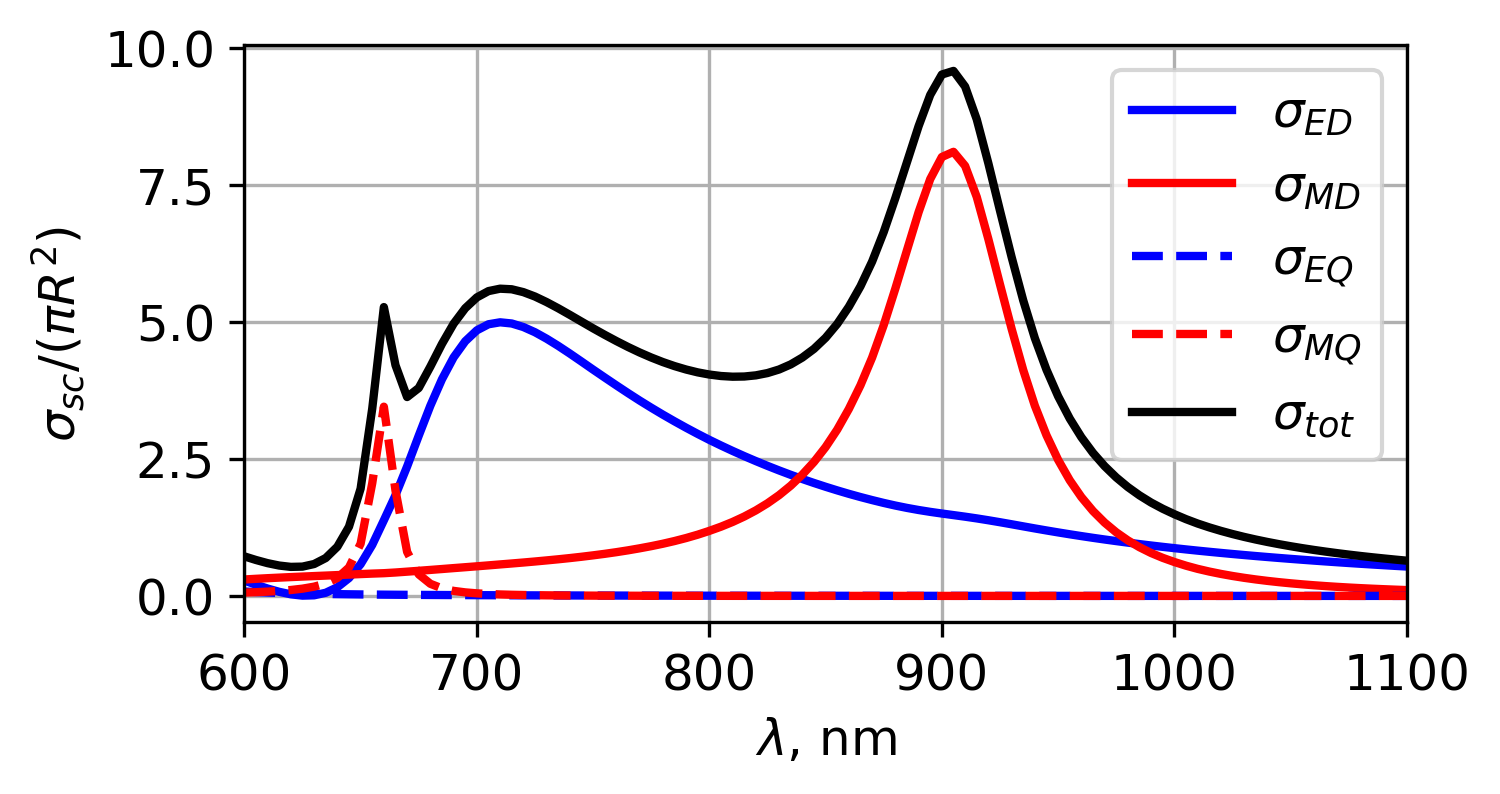

In [57]:
sigma_dip = np.loadtxt('COMSOL\\ED_MD_120.txt', skiprows=8, delimiter=',')
sigma_quad = np.loadtxt('COMSOL\\EQ_MQ_120.txt', skiprows=8, delimiter=',')

mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(sigma_dip[:, 0], sigma_dip[:, 1], label='$\\sigma_{ED}$', linewidth=2, color='b')
plt.plot(sigma_dip[:, 0], sigma_dip[:, 2], label='$\\sigma_{MD}$', linewidth=2, color='r')
plt.plot(sigma_quad[:, 0], sigma_quad[:, 1], label='$\\sigma_{EQ}$', linewidth=2, color='b', ls='--')
plt.plot(sigma_quad[:, 0], sigma_quad[:, 2], label='$\\sigma_{MQ}$', linewidth=2, color='r', ls='--')
plt.plot(sigma_quad[:, 0], sigma_dip[:, 1]+sigma_dip[:, 2]+sigma_quad[:, 1]+sigma_quad[:, 2], label='$\\sigma_{tot}$', linewidth=2, color='black')
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$\sigma_{sc}/(\pi R^2)$')
plt.grid()
plt.xlim(sigma_dip[0, 0], sigma_dip[-1, 0])
plt.legend()
plt.savefig('sigma_sc_dip_quad.pdf', bbox_inches='tight')

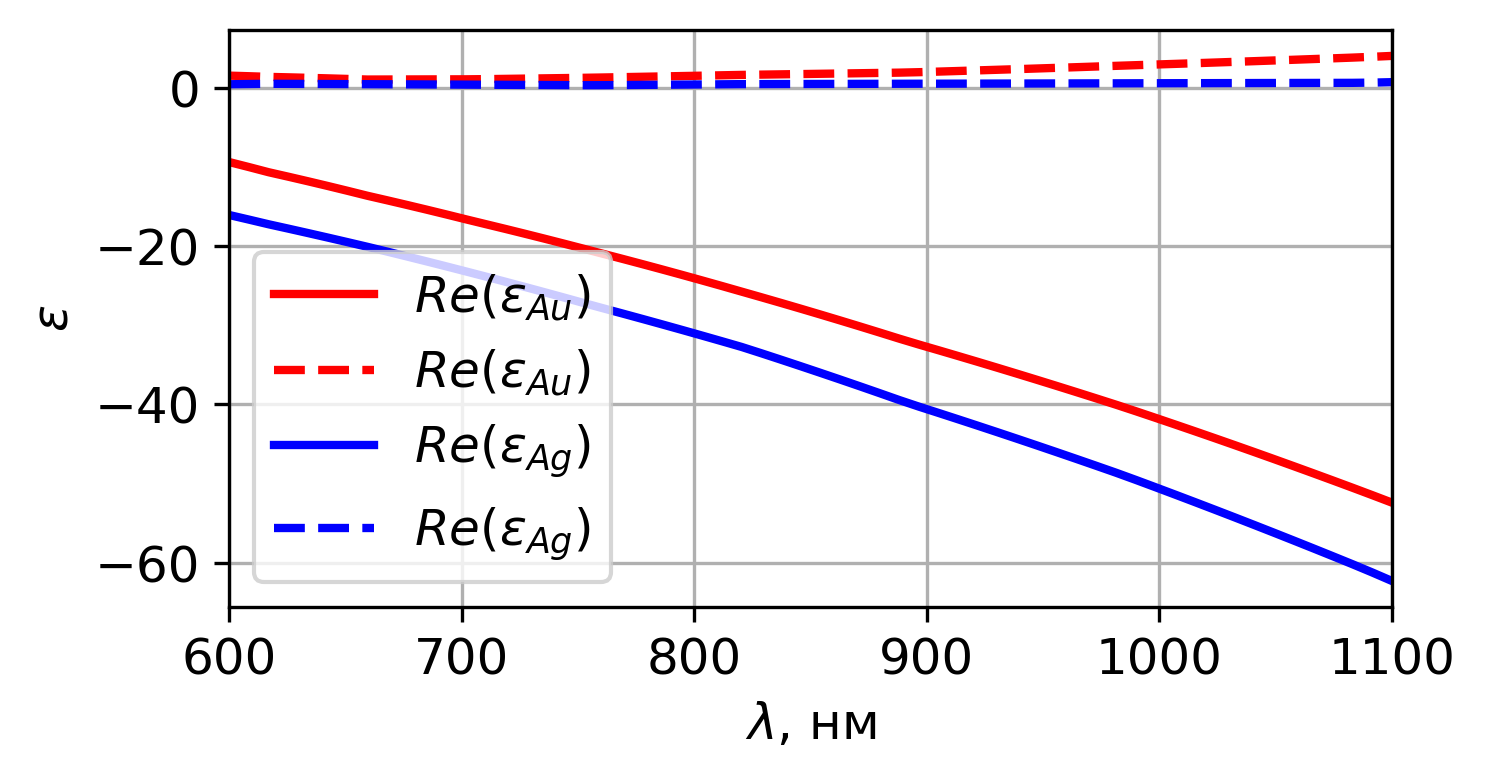

In [9]:

mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

eps_Au = frenel.get_interpolate('Au')
eps_Ag = frenel.get_interpolate('Ag')

plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, eps_Au(wls).real, label=r'$Re(\varepsilon_{Au})$', c='r', lw=2 )
plt.plot(wls, eps_Au(wls).imag, label=r'$Re(\varepsilon_{Au})$', c='r', lw=2, ls='--' )

plt.plot(wls, eps_Ag(wls).real, label=r'$Re(\varepsilon_{Ag})$', c='b', lw=2 )
plt.plot(wls, eps_Ag(wls).imag, label=r'$Re(\varepsilon_{Ag})$', c='b', lw=2, ls='--' )

plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'$\lambda$, нм')
plt.xlim(wls[0], wls[-1] )

plt.grid()
plt.legend()
plt.savefig('eps_Ag_Au.pdf', bbox_inches='tight')

In [99]:
R = 120
dist = 2
a_angle =0
phase = 0
ANGLE = 25*np.pi/180
point = [0,0,dist+R]
STOP=45

wls=np.linspace(600,1100,100)
# angles = np.linspace(1*np.pi/180, 65*np.pi/180, 60)


P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)



for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

  3%|▎         | 3/100 [00:02<01:13,  1.32it/s]


KeyboardInterrupt: 

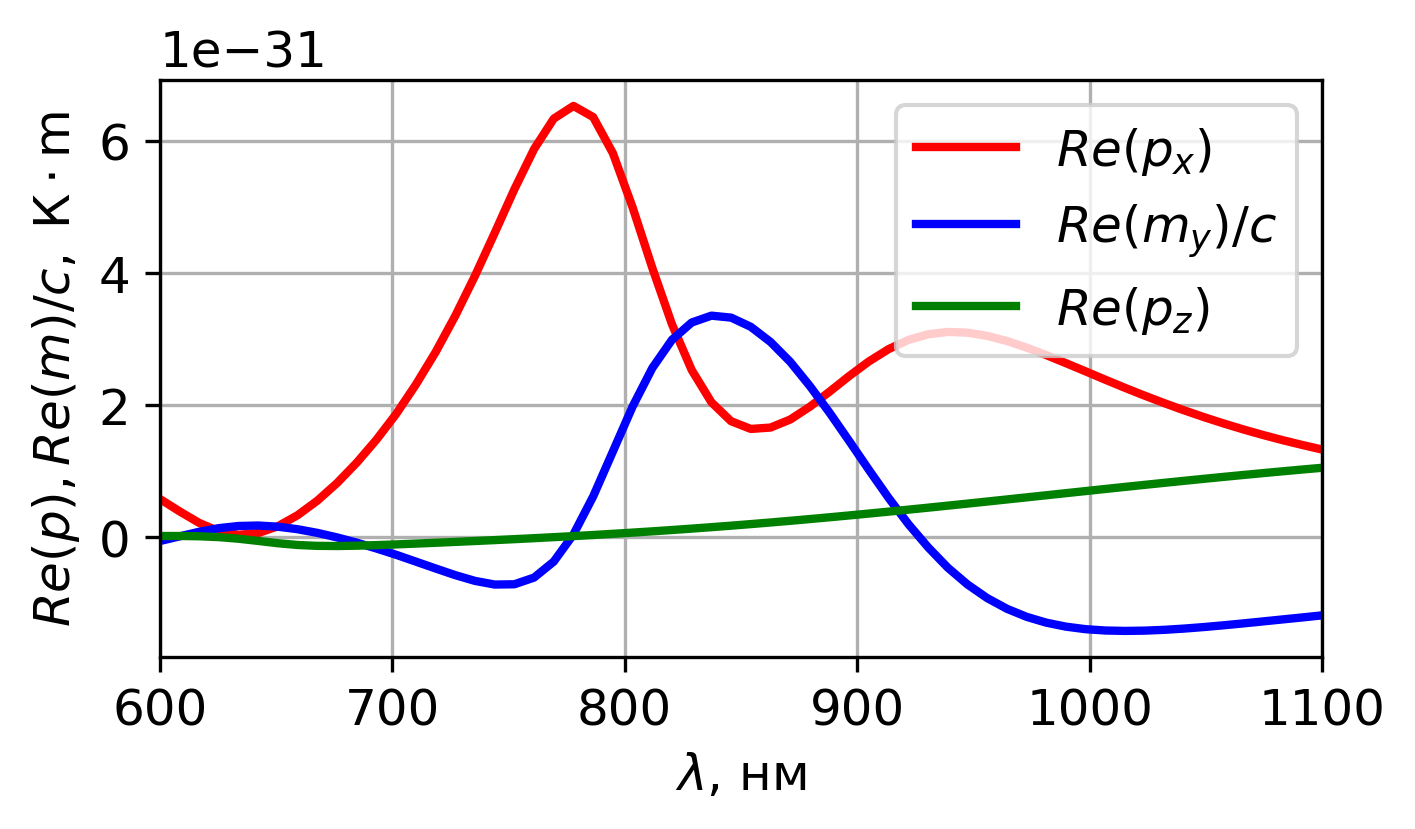

In [18]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12
plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, P[:,0].real, label=r'$Re(p_x)$', c='red', lw=2)
plt.plot(wls, M[:,1].real/c_const, label=r'$Re(m_y)/c$', c='blue', lw=2)
plt.plot(wls, P[:,2].real, label=r'$Re(p_z)$', c='green', lw=2)
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, нм')
plt.ylabel(r'$Re(p), Re(m)/c,\; \text{К}\cdot\text{m}$')
plt.xlim(wls[0], wls[-1])
plt.savefig('dipoles_Au_Si.pdf', bbox_inches='tight')

(600.0, 1100.0)

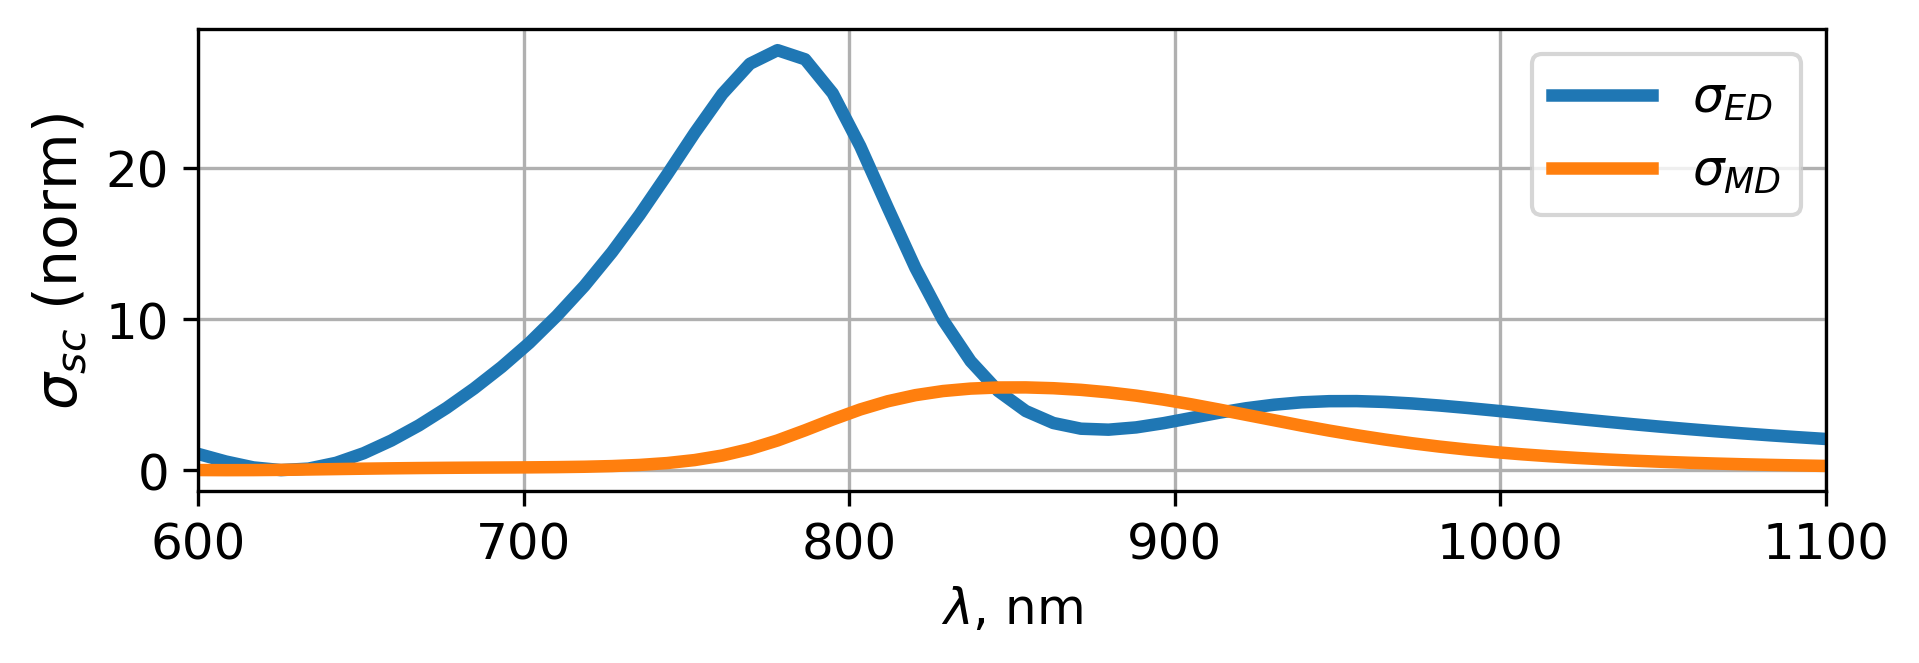

In [19]:
const_sigma_sc = k0(wls)**4/(6*np.pi*eps0_const**2)

ED = np.abs(P[:,0])**2+ np.abs(P[:,1])**2+np.abs(P[:,2])**2

MD = (np.abs(M[:,0])**2+ np.abs(M[:,1])**2+np.abs(M[:,2])**2)/c_const**2

sigma_ED = ED *const_sigma_sc
sigma_MD = MD * const_sigma_sc




fig, ax1 = plt.subplots(1, 1, figsize=(7, 2), dpi=300)

# Первый график: ED и MD

ax1.plot(wls, sigma_ED/(np.pi*(R*1e-9)**2), label='$\\sigma_{ED}$', lw=3)
ax1.plot(wls, sigma_MD/(np.pi*(R*1e-9)**2), label='$\\sigma_{MD}$', lw=3)


# ax1.plot(sigma_sc[:, 0], sigma_sc[:, 1], label='$\\sigma_{ED}$', linewidth=2, color='#1f77b4', ls='--')
# ax1.plot(sigma_sc[:, 0], sigma_sc[:, 2], label='$\\sigma_{MD}$', linewidth=2, color='#ff7f0e', ls='--')
ax1.set_ylabel('$\\sigma_{sc}$ (norm)', fontsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)
ax1.set_xlabel('$\\lambda$, nm')

plt.xlim(wls[0], wls[-1])

#plt.savefig(f'sigma_sc_from_wl_z0_{point[2]}.pdf', dpi=300)

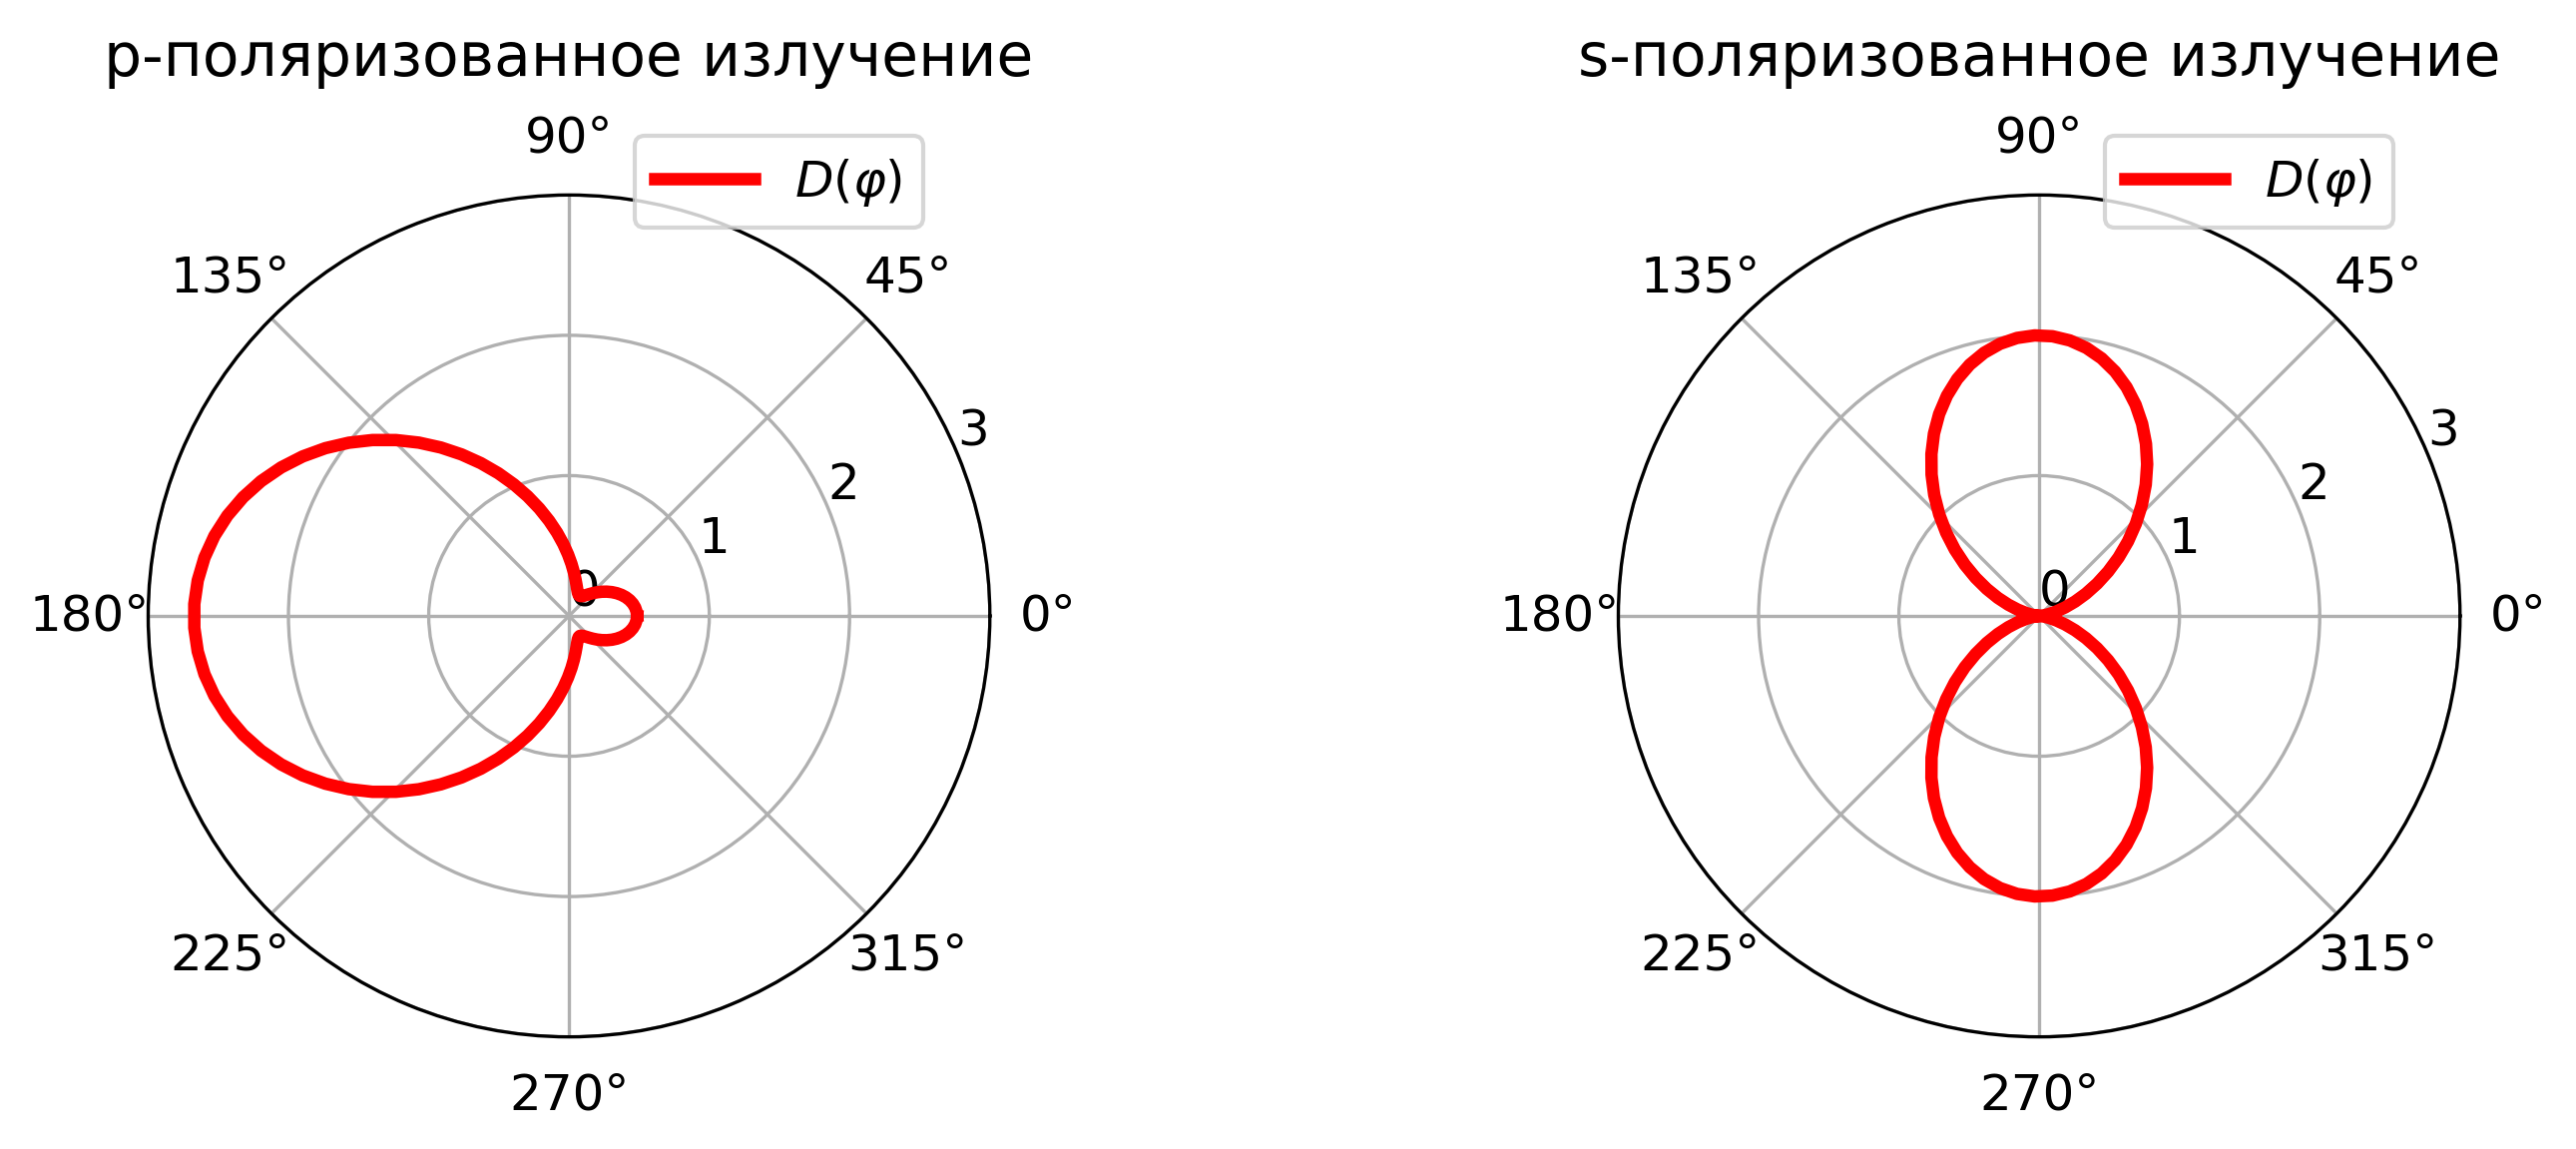

In [68]:
# 740 - max fwd
# 810 - max bwd
wl1 = 795
R = 120 
ANGLE = 25*np.pi/180
dist = 2
a_angle =0
phase = 0
point = [0,0,dist+R]
wl2=800

PP1, MM1 = dipoles.calc_dipoles_v2(wl1, eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)

PP2, MM2 = dipoles.calc_dipoles_v2(wl2, eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=np.pi/2, stop=STOP)

PHI = np.linspace(0, 2*np.pi, 100)

D1 = get_directivity(wl1, PP1, MM1, eps_Au)

D2 = get_directivity(wl2, PP2, MM2, eps_Au)


# Создание фигуры и двух полярных подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=300, subplot_kw={'projection': 'polar'})

# Первый график
ax1.plot(PHI, D1(PHI), lw=3, label=r'$D(\varphi)$', c='r')
ax1.set_rticks([0, 1, 2, 3])  # Настройка радиальных делений
ax1.set_title(r'p-поляризованное излучение', va='bottom')  # Заголовок первого графика
ax1.legend(loc='best', bbox_to_anchor=(0.95, 1.1))  # Легенда


# Второй график (пустой, для последующего заполнения)
ax2.plot(PHI, D2(PHI), lw=3, label=r'$D(\varphi)$', c='r')
ax2.set_rticks([0, 1, 2, 3])
ax2.set_title('s-поляризованное излучение', va='bottom')
ax2.legend(loc='best', bbox_to_anchor=(0.95, 1.1))



plt.tight_layout()
plt.savefig(f'spp_p_s_pol.svg', dpi=300)
plt.show()


In [18]:


wls = np.linspace(600, 1100, 100)
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')
R = 100
dist = 2
ANGLE = 25*np.pi/180
point = [0,0,dist+R]
STOP=45
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)
a_angle = np.pi/4
phase = -np.pi/2
F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, ANGLE,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]


  5%|▌         | 5/100 [00:11<03:33,  2.25s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


In [19]:
fmax_wls = 0
for i in range(len(wls)):
    f0 = force.F(wls[i], 1, [0,0,0], R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)[2]
    f0 = np.abs(f0)
    if f0 > fmax_wls:
        fmax_wls = f0

In [20]:
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)



for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 100/100 [00:00<00:00, 3207.37it/s]


In [ ]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

plt.figure(figsize=(5,2.5), dpi=300)
plt.plot(wls, F_x[:,0]/fmax_wls)
plt.plot(wls, F_y[:,0]/fmax_wls)
plt.plot(wls, F_z[:,0]/fmax_wls)


plt.plot(wls, F_x[:,0]/fmax_wls, label=r'$F_x$', c='red', lw=2)
plt.plot(wls, F_y[:,0]/fmax_wls, label=r'$F_y$', c='blue', lw=2)
plt.plot(wls, F_z[:,0]/fmax_wls, label=r'$F_z$', c='green', lw=2)
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, нм')
plt.ylabel(r'$F/F_0$')
plt.xlim(wls[0], wls[-1])
plt.savefig('froce_RCP.pdf', bbox_inches='tight')

NameError: name 'mpl' is not defined

In [23]:
dip_p = np.loadtxt('COMSOL\\p_comsol_100.txt', skiprows=8, delimiter=',')

C:\Users\borod\AppData\Local\Temp\ipykernel_15632\3275883495.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label="COMSOL", ls='--', c='grey')
C:\Users\borod\AppData\Local\Temp\ipykernel_15632\3275883495.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label="Теория",ls='-', c='grey')


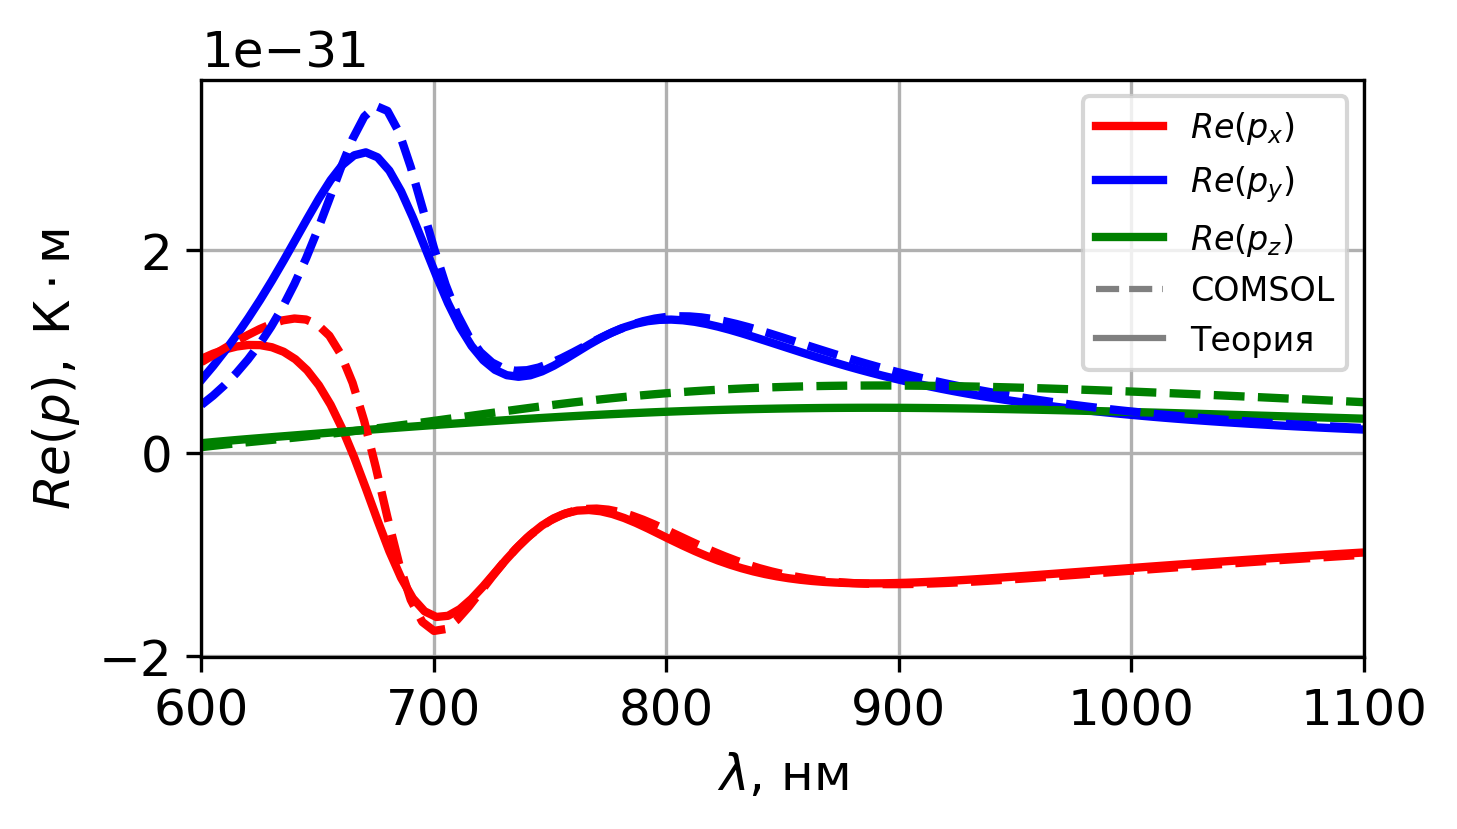

In [38]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12
plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, P[:,0].real, label=r'$Re(p_x)$', c='red', lw=2)
plt.plot(wls, P[:,1].real, label=r'$Re(p_y)$', c='blue', lw=2)
plt.plot(wls, P[:,2].real, label=r'$Re(p_z)$', c='green', lw=2)

plt.plot(dip_p[:,0], dip_p[:,1], c='red', lw=2, ls='--')
plt.plot(dip_p[:,0], dip_p[:,2], c='blue', lw=2, ls='--')
plt.plot(dip_p[:,0], dip_p[:,3], c='green', lw=2, ls='--')

plt.plot([], [], ' ', label="COMSOL", ls='--', c='grey')
plt.plot([], [], ' ', label="Теория",ls='-', c='grey')


plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.xlabel(r'$\lambda$, нм')
plt.ylabel(r'$Re(p),\; \text{К}\cdot\text{м}$')
plt.xlim(wls[0], wls[-1])
plt.savefig('p_compare.pdf', bbox_inches='tight')

In [40]:
dip_m = np.loadtxt('COMSOL\\m_comsol_100.txt', skiprows=8, delimiter=',')

C:\Users\borod\AppData\Local\Temp\ipykernel_15632\3429292727.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label="COMSOL", ls='--', c='grey')
C:\Users\borod\AppData\Local\Temp\ipykernel_15632\3429292727.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label="Теория",ls='-', c='grey')


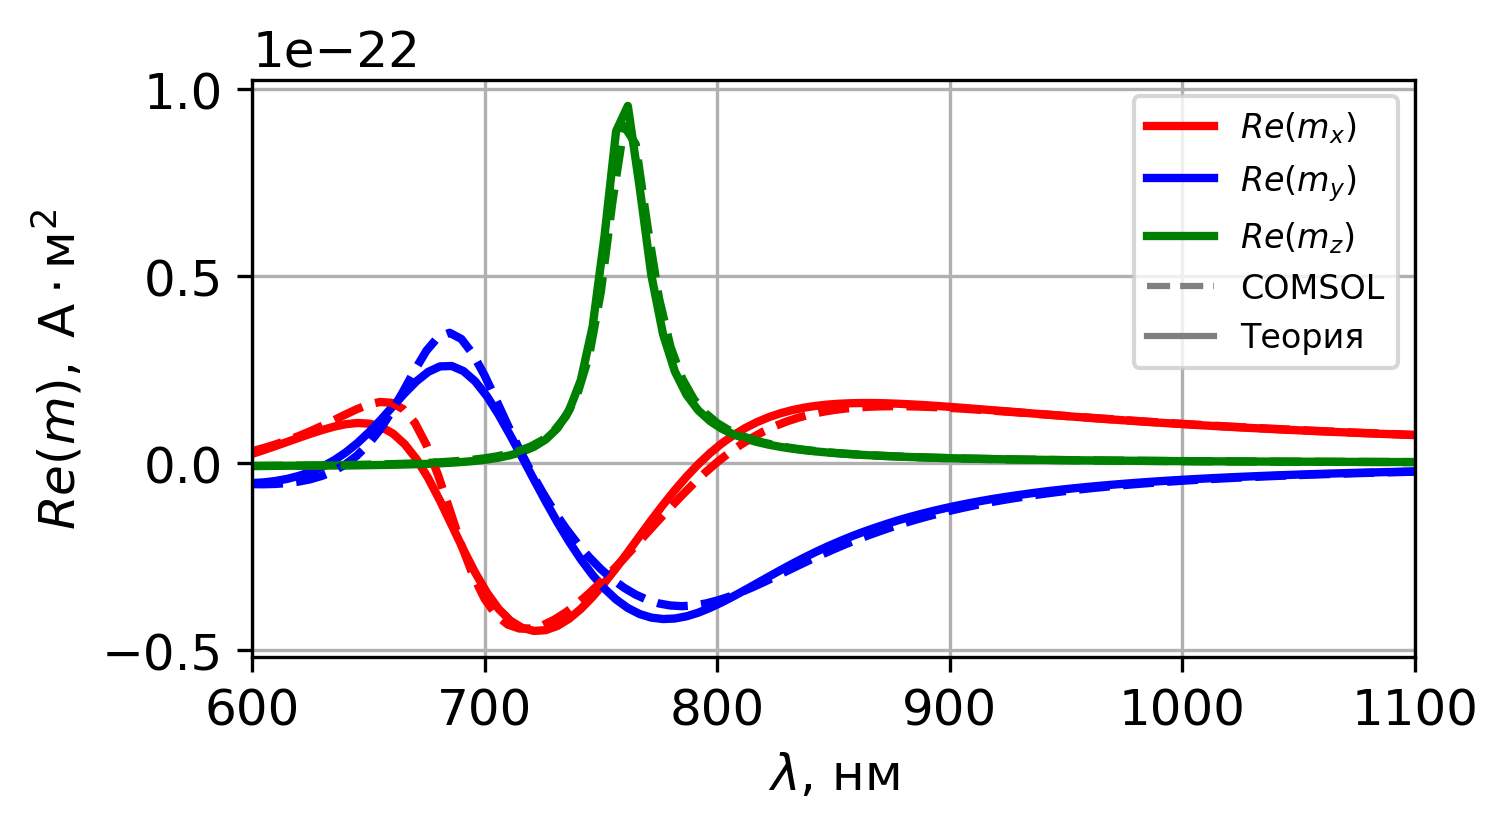

In [41]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12
plt.figure(figsize=(5, 2.5), dpi=300)
plt.plot(wls, M[:,0].real, label=r'$Re(m_x)$', c='red', lw=2)
plt.plot(wls, M[:,1].real, label=r'$Re(m_y)$', c='blue', lw=2)
plt.plot(wls, M[:,2].real, label=r'$Re(m_z)$', c='green', lw=2)

plt.plot(dip_m[:,0], dip_m[:,1], c='red', lw=2, ls='--')
plt.plot(dip_m[:,0], dip_m[:,2], c='blue', lw=2, ls='--')
plt.plot(dip_m[:,0], dip_m[:,3], c='green', lw=2, ls='--')

plt.plot([], [], ' ', label="COMSOL", ls='--', c='grey')
plt.plot([], [], ' ', label="Теория",ls='-', c='grey')


plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.xlabel(r'$\lambda$, нм')
plt.ylabel(r'$Re(m),\; \text{А}\cdot\text{м}^2$')
plt.xlim(wls[0], wls[-1])
plt.savefig('m_compare.pdf', bbox_inches='tight')

In [43]:
f_comsol = np.loadtxt('COMSOL\\force_2d_comsol_100.txt', skiprows=8, delimiter=',')

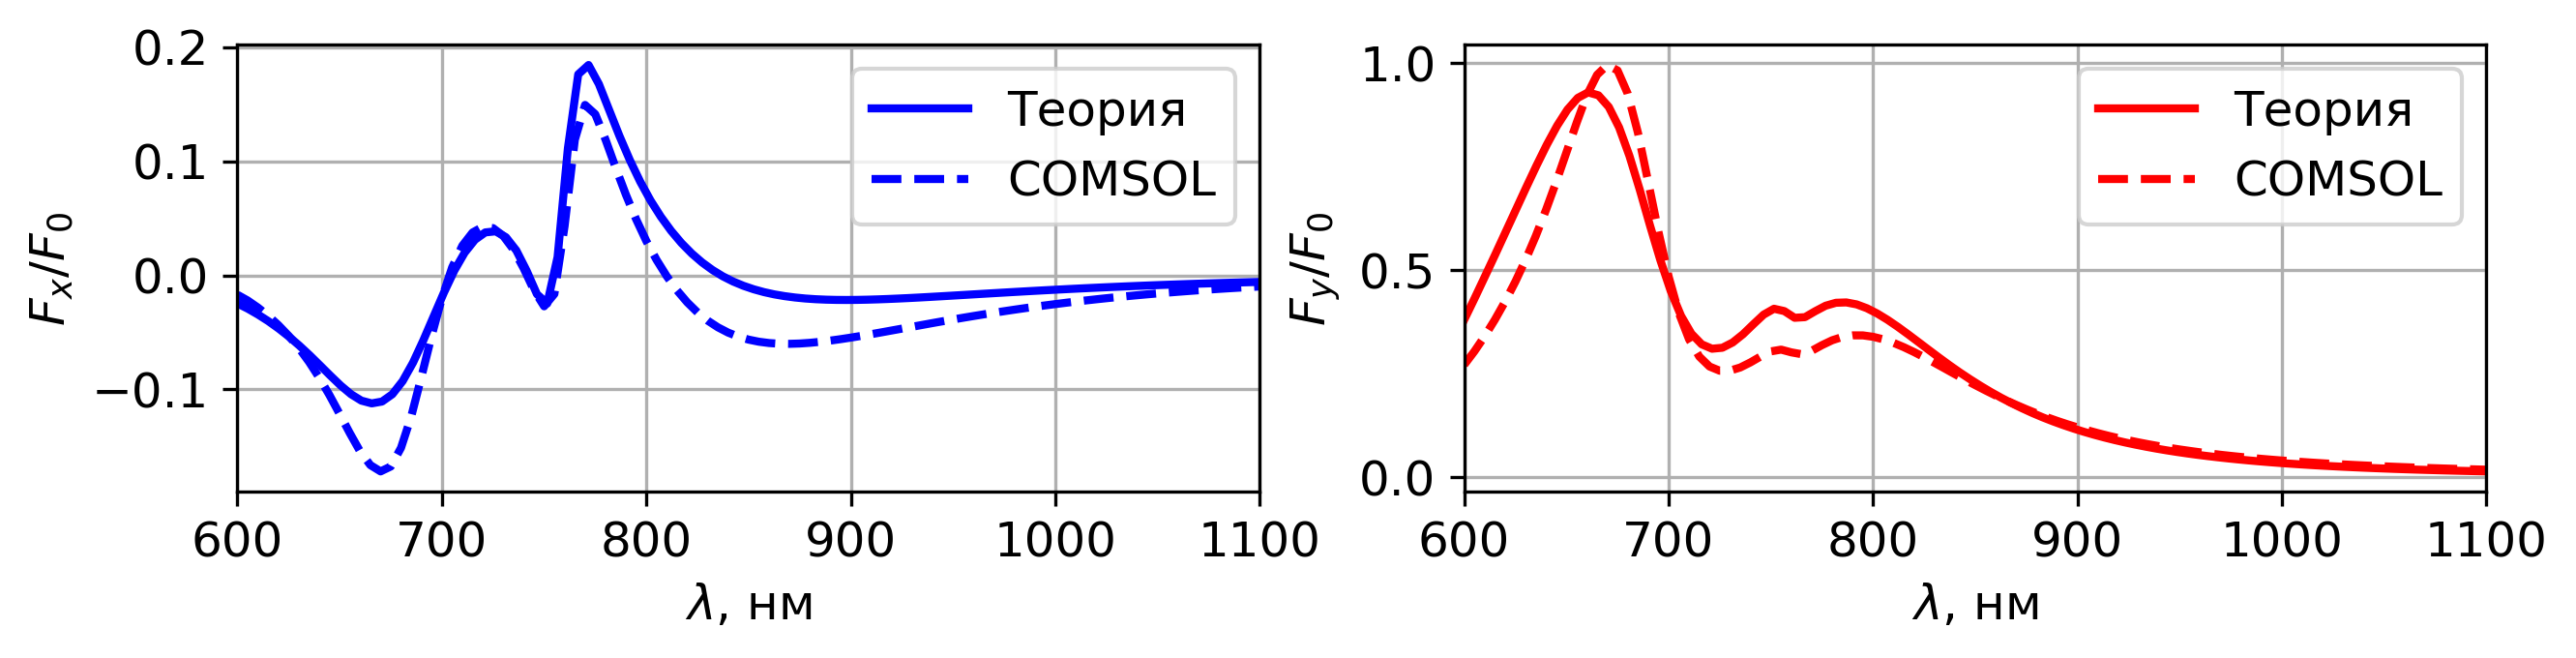

In [57]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

# Создание фигуры и двух полярных подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2), dpi=300)


ax2.plot(wls, F_x[:,0]/fmax_wls, label=r'Теория', c='red', lw=2)
ax1.plot(wls, F_y[:,0]/fmax_wls, label=r'Теория', c='blue', lw=2)
#plt.plot(wls, F_z[:,0]/fmax_wls, label=r'$F_z$', c='green', lw=2)


ax2.plot(f_comsol[:,0], f_comsol[:,1]/fmax_wls, label=r'COMSOL', c='red', lw=2, ls='--')
ax1.plot(f_comsol[:,0], f_comsol[:,2]/fmax_wls, label=r'COMSOL', c='blue', lw=2, ls='--')
#plt.plot(f_comsol[:,0], f_comsol[:,3]/fmax_wls, c='green', lw=2, ls='--')
ax1.grid()
ax1.legend()
ax1.set_xlabel(r'$\lambda$, нм')
ax1.set_ylabel(r'$F_x/F_0$')
ax1.set_xlim(wls[0], wls[-1])

ax2.grid()
ax2.legend()
ax2.set_xlabel(r'$\lambda$, нм')
ax2.set_ylabel(r'$F_y/F_0$')
ax2.set_xlim(wls[0], wls[-1])
plt.savefig('fxy_compare_RCP.pdf', bbox_inches='tight')

In [21]:
PHI = np.linspace(-np.pi, np.pi,60)
directivity = np.empty((len(wls),len(PHI)))

for i in tqdm(range(len(wls))):
    D = get_directivity(wls[i], P[i,:], M[i,:], eps_Au)
    for j in range(len(PHI)):
        directivity[i,j] = D(PHI[j])

100%|██████████| 100/100 [00:01<00:00, 93.22it/s]


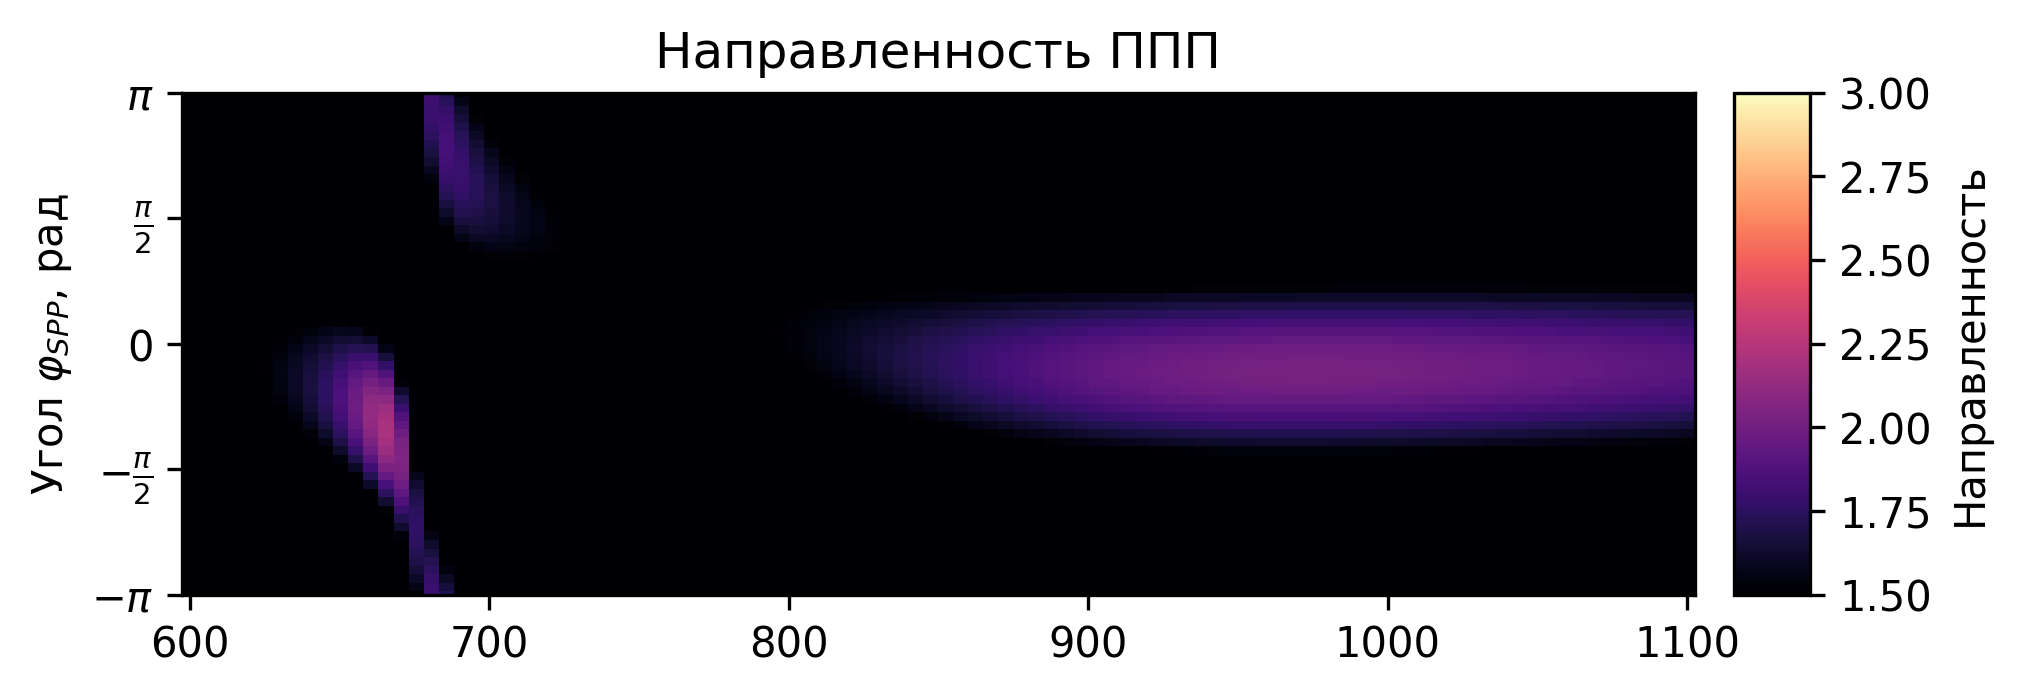

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np


# === Создание фигуры и макета ===
fig = plt.figure(figsize=(7, 5), dpi=300)
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[1, 1], hspace=0.3, wspace=0.05)

# # === Верхний график (тепловая карта) ===
ax_top = fig.add_subplot(gs[0, 0])
directivity_map = ax_top.pcolor( wls, PHI, directivity.T, cmap='magma', vmax=3, vmin=1.5)

# Настройка оси Y: метки углов в виде кратных π
y_ticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
y_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
y_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_ticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
ax_top.set_yticks(y_ticks)
ax_top.set_yticklabels(y_ticklabels)

ax_top.set_ylim(-np.pi, np.pi)
ax_top.set_ylabel(r'Угол $\varphi_{SPP}$, рад')
ax_top.set_title('Направленность ППП')

# # === Colorbar ===
cax = fig.add_subplot(gs[0, 1])
fig.colorbar(directivity_map, cax=cax, label='Направленность')

#plt.savefig(f'spp_vs_f_nosc_from_wl_z0_{point[2]}_R_{R}_phase_{round(phase,2)}_beta_{round(a_angle,2)}.png', dpi=300)



In [24]:
D700 = np.loadtxt('COMSOL\\D_comsol700.txt', skiprows=8, delimiter=',')
D800 = np.loadtxt('COMSOL\\D_comsol800.txt', skiprows=8, delimiter=',')

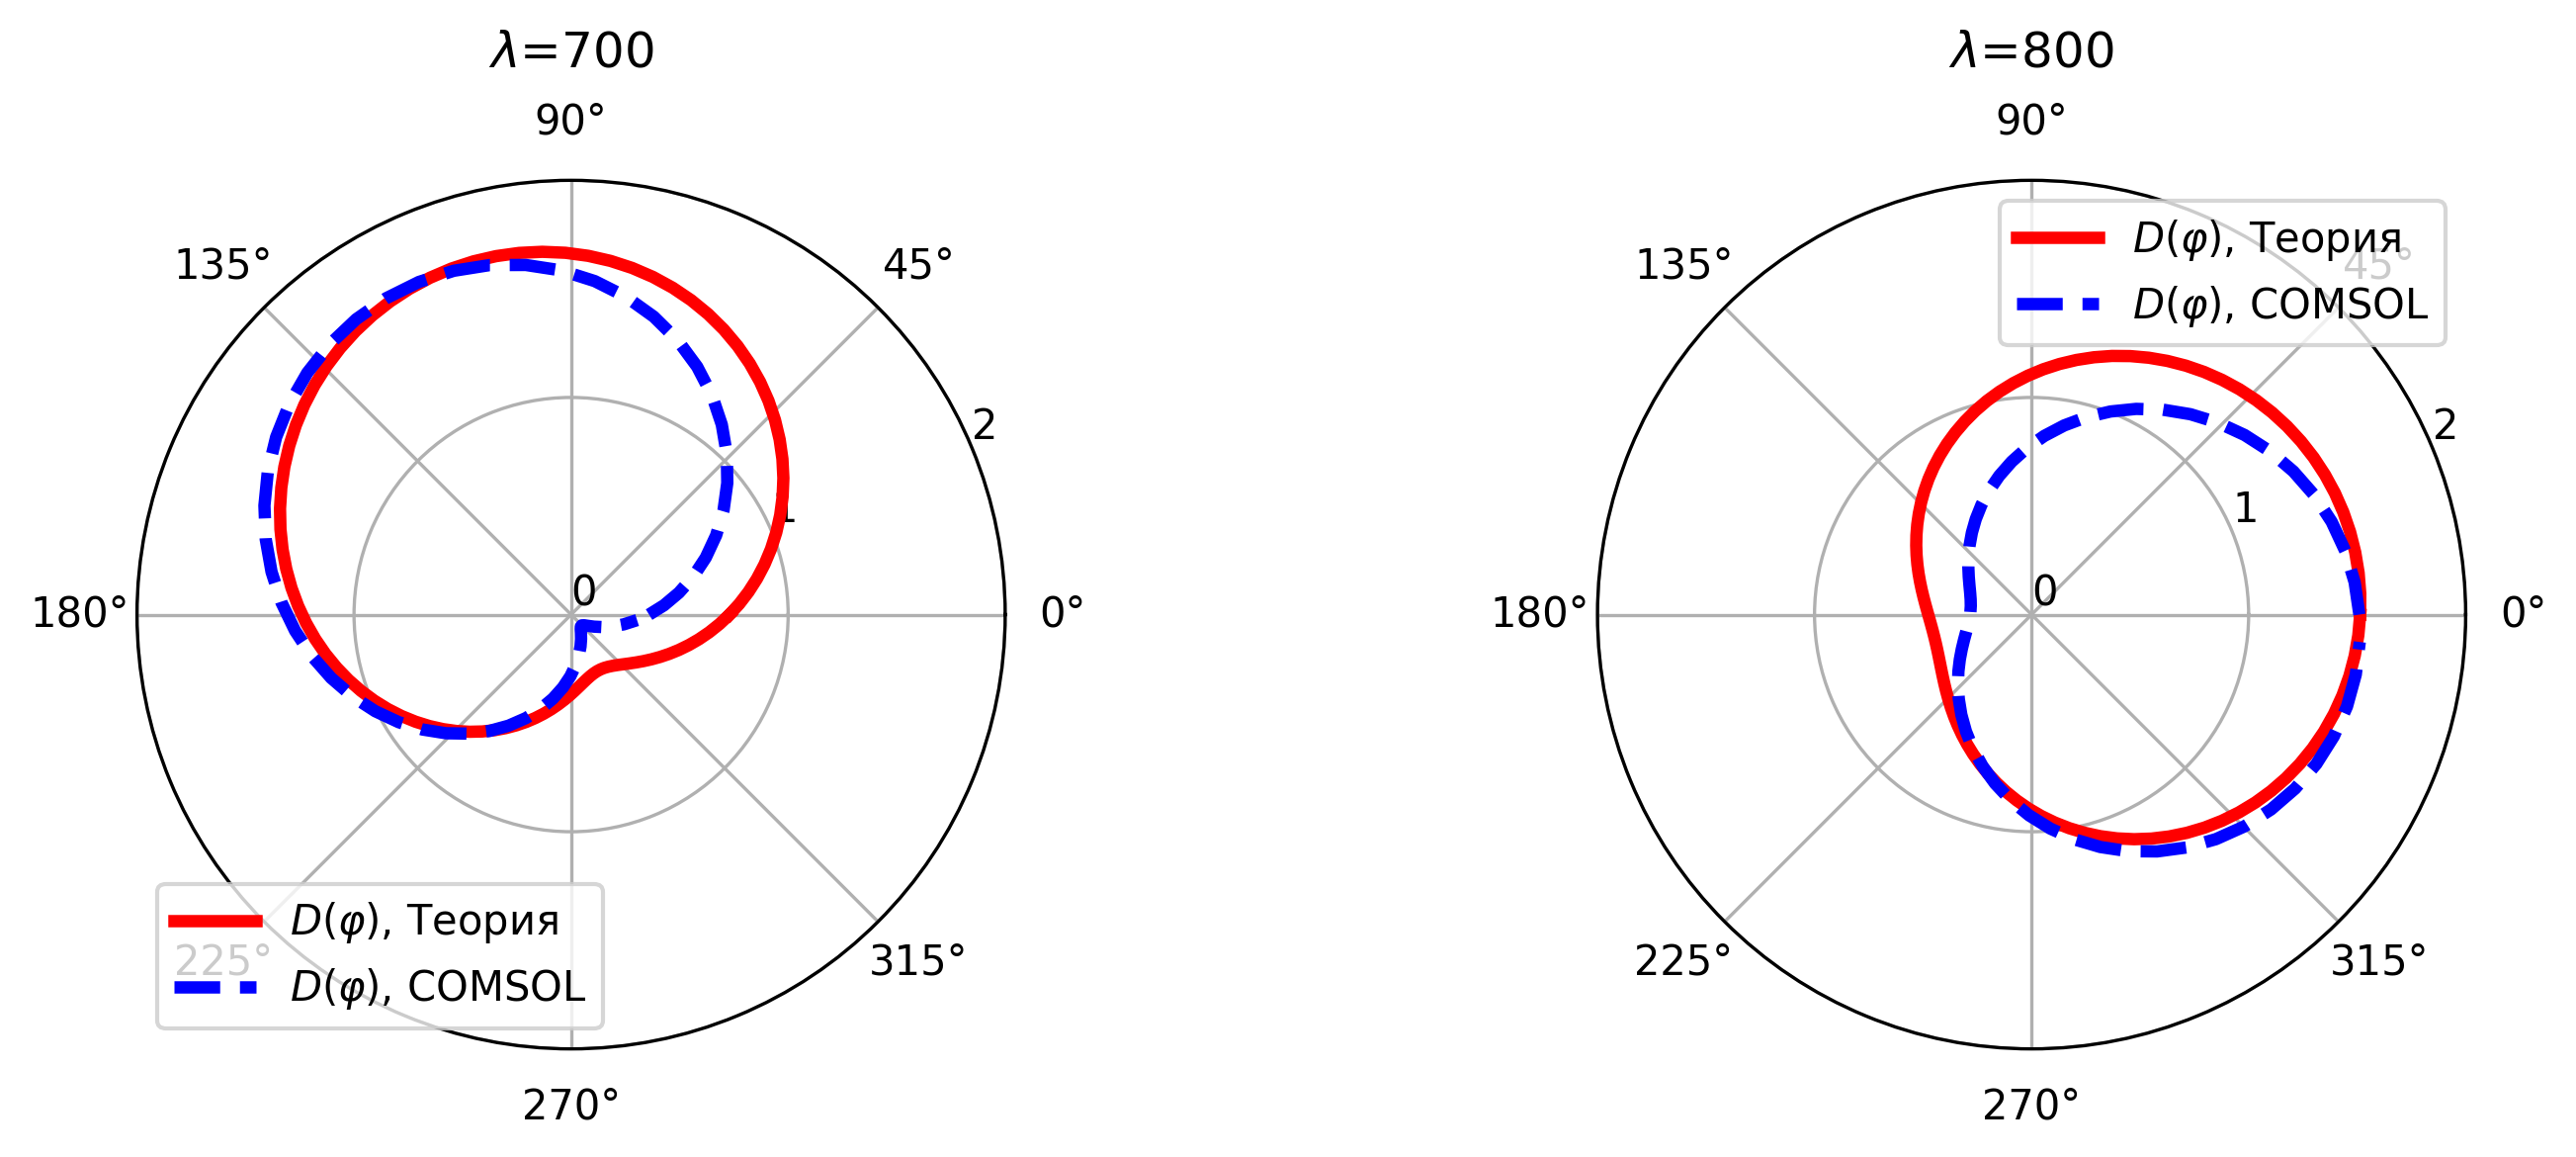

: 

In [ ]:

R = 100
ANGLE = 25*np.pi/180
dist = 2
a_angle =np.pi/4
phase = -np.pi/2
point = [0,0,dist+R]
wl1=700
wl2=800

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

PP1, MM1 = dipoles.calc_dipoles_v2(wl1, eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)

PP2, MM2 = dipoles.calc_dipoles_v2(wl2, eps_Au, point, R, eps_Si, ANGLE, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)

PHI = np.linspace(0, 2*np.pi, 100)

D1 = get_directivity(wl1, PP1, MM1, eps_Au)

D2 = get_directivity(wl2, PP2, MM2, eps_Au)


# Создание фигуры и двух полярных подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=300, subplot_kw={'projection': 'polar'})

# Первый график
ax1.plot(PHI, D1(PHI), lw=3, label=r'$D(\varphi)$, Теория', c='r')

ax1.plot(D700[:,0], D700[:,1]/np.max(D700[:,1])*np.max(D1(PHI)), lw=3, label=r'$D(\varphi)$, COMSOL', c='b', ls='--')


ax1.set_rticks([0, 1, 2])  # Настройка радиальных делений
ax1.set_title(f'$\\lambda$={wl1}', va='bottom')  # Заголовок первого графика
ax1.legend(loc='best')  # Легенда


# Второй график (пустой, для последующего заполнения)
ax2.plot(PHI, D2(PHI), lw=3, label=r'$D(\varphi)$, Теория', c='r')
ax2.plot(D800[:,0], D800[:,1]/np.max(D800[:,1])*np.max(D2(PHI)), lw=3, label=r'$D(\varphi)$, COMSOL', c='b', ls='--')

ax2.set_rticks([0, 1, 2])
ax2.set_title(f'$\\lambda$={wl2}', va='bottom')
ax2.legend(loc='best')



plt.tight_layout()
plt.savefig(f'spp_D_compare.svg', dpi=300)
plt.show()
